In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io,color,transform
import scipy
import scipy.ndimage
import skimage
from PIL import Image

# Data Preprocessing

In [ ]:
book = io.imread('/content/drive/MyDrive/books.png')
building = io.imread('/content/drive/MyDrive/building.png')

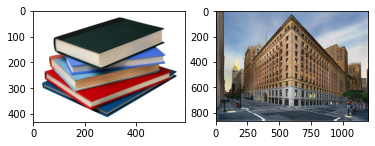

In [ ]:
plt.subplot(1,2,1)
plt.imshow(book)
plt.subplot(1,2,2)
plt.imshow(building)

In [ ]:
building.shape

(869, 1200, 4)

In [ ]:
book=color.rgb2grey(book)
building=color.rgb2grey(building)

<ipython-input-5-f216232e3db1>:1: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  book=color.rgb2grey(book)
/usr/local/lib/python3.8/dist-packages/skimage/color/colorconv.py:794: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  return rgb2gray(rgb)
<ipython-input-5-f216232e3db1>:2: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  building=color.rgb2grey(building)


In [ ]:
building.shape

(869, 1200)

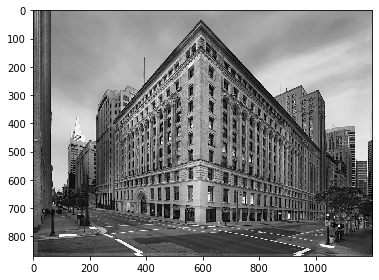

In [ ]:
io.imshow(building)

# (a) Scale space extrema detection of original image

I have used here one octave of 10 levels

In [ ]:
img1 = book
img2 = building 

Function to create scale space for a octave

In [ ]:
def octave(img,row,col):
  count = 0
  sigma = 1.6
  l = 10 #number of levels
  k = 2**(1/(l-1))
  gaussian = []
  DOG =[]
  extremas=[]
  for i in range(0,l):
    gaussian.append(scipy.ndimage.gaussian_filter(img,sigma*(k**i))*255)
  for i in range(0,l-1):
    DOG.append(gaussian[i+1]-gaussian[i])
  for i in range(1,len(DOG)-1):
    x,y=extrema_points(DOG[i-1],DOG[i],DOG[i+1],row,col)
    extremas.append(x)
    count = count+y
  return extremas,count

Function to extract features from scale space

In [ ]:
def extrema_points(low,mid,up,row,col):
  count=0
  matrix = np.zeros((row,col))
  temp = np.zeros((row,col))
  for i in range(1,row-1):
    for j in range(1,col-1):
      value=mid[i][j]
      temp1 = low[i-1:i+2,j-1:j+2]
      #print(temp1)
      temp2 = up[i-1:i+2,j-1:j+2]
      #print(np.max(temp2))
      temp3 = mid[i-1:i+2,j-1:j+2]
      #print(temp3)
      temp_mid1=np.copy(temp3)  #Else they refer to the same matrix
      temp_mid2=np.copy(temp3)
      temp_mid1[1][1]=temp3[1][1]-1 
      temp_mid2[1][1]=temp3[1][1]+1
      if value>np.max(temp1) and value>np.max(temp_mid1) and value>np.max(temp2):
        matrix[i][j]=1
        count=count+1
        #print(i,j)
      if value<np.min(temp1) and value<np.min(temp_mid2) and value<np.min(temp2):
        matrix[i][j]=1
        count=count+1
        #print(i,j)
  #print(count)   
  for i in range(1,row-1):
    for j in range(1,col-1):
      if matrix[i][j]==1:
        temp[i-1:i+2,j-1:j+2]=np.ones((3,3))
  return temp,count

Finding different feature scales for image 1

In [ ]:
row = img1.shape[0]
col = img1.shape[1]
scale_space_img1,count = octave(img1,row,col)
print("The number of features is:")
print(count)

The number of features is:
1483


Finding different feature scales for image 2

In [ ]:
row = img2.shape[0]
col = img2.shape[1]
scale_space_img2,count = octave(img2,row,col)
print("The number of features is:")
print(count)

The number of features is:
6538


Downloading each feature scale features to my desktop

In [ ]:
for i in range(0,len(scale_space_img1)):
  x=img1+scale_space_img1[i]
  x=(x*255/2).astype(np.uint8)
  x = Image.fromarray(x)
  x.save('feature scale of book image1_'+str(i)+'.jpeg')
  files.download('feature scale of book image1_'+str(i)+'.jpeg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
for i in range(0,len(scale_space_img2)):
  x=img2+scale_space_img2[i]
  x=(x*255/2).astype(np.uint8)
  x = Image.fromarray(x)
  x.save('feature scale of book image2_'+str(i)+'.jpeg')
  files.download('feature scale of book image2_'+str(i)+'.jpeg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Combining different scale features to one feature image

In [ ]:
img1_features = np.zeros((img1.shape[0],img1.shape[1]))
for i in range(0,img1.shape[0]):
  for j in range(0,img1.shape[1]):
    temp = 0
    for k in range(0,len(scale_space_img1)):
      tmp = scale_space_img1[k]
      temp=temp+tmp[i][j]
      if temp>=1:
        img1_features[i][j]=1
        break
img1_features = img1_features + img1


/usr/local/lib/python3.8/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


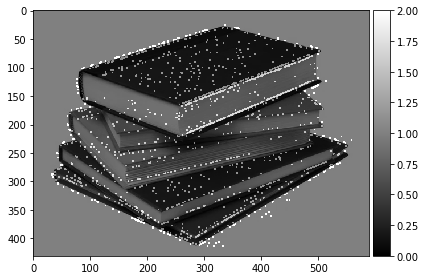

In [ ]:
io.imshow(img1_features,cmap='gray')

In [ ]:
img2_features = np.zeros((img2.shape[0],img2.shape[1]))
for i in range(0,img2.shape[0]):
  for j in range(0,img2.shape[1]):
    temp = 0
    for k in range(0,len(scale_space_img2)):
      tmp = scale_space_img2[k]
      temp=temp+tmp[i][j]
      if temp>=1:
        img2_features[i][j]=1
        break
img2_features = img2_features + img2

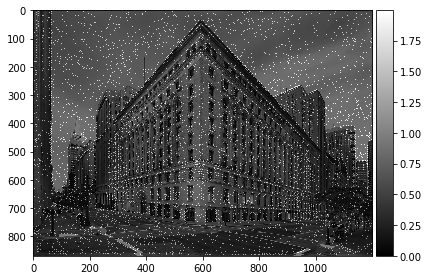

In [ ]:
io.imshow(img2_features,cmap='gray')

Downloading combined feature images to my laptop

In [ ]:
x=img1_features
x=(x*255/2).astype(np.uint8)
x = Image.fromarray(x)
x.save('Image1.jpeg')
files.download('Image1.jpeg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
x=img2_features
x=(x*255/2).astype(np.uint8)
x = Image.fromarray(x)
x.save('Image2.jpeg')
files.download('Image2.jpeg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# (b) Keypoint detection on modified image

## Rotated image


In [ ]:
img1 = skimage.transform.rotate(book,45)
img2 = skimage.transform.rotate(building,45)

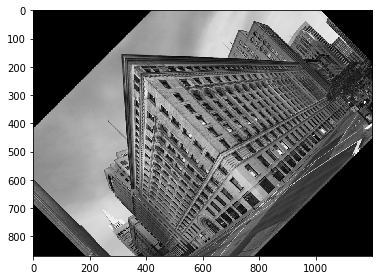

In [ ]:
io.imshow(img2)

In [ ]:
row = img1.shape[0]
col = img1.shape[1]
scale_space_img1,count = octave(img1,row,col)
print("The number of features is:")
print(count)

The number of features is:
1353


In [ ]:
row = img2.shape[0]
col = img2.shape[1]
scale_space_img2,count = octave(img2,row,col)
print("The number of features is:")
print(count)

The number of features is:
5857


In [ ]:
img1_features = np.zeros((img1.shape[0],img1.shape[1]))
for i in range(0,img1.shape[0]):
  for j in range(0,img1.shape[1]):
    temp = 0
    for k in range(0,len(scale_space_img1)):
      tmp = scale_space_img1[k]
      temp=temp+tmp[i][j]
      if temp>=1:
        img1_features[i][j]=1
        break
img1_features = img1_features + img1


In [ ]:
img2_features = np.zeros((img2.shape[0],img2.shape[1]))
for i in range(0,img2.shape[0]):
  for j in range(0,img2.shape[1]):
    temp = 0
    for k in range(0,len(scale_space_img2)):
      tmp = scale_space_img2[k]
      temp=temp+tmp[i][j]
      if temp>=1:
        img2_features[i][j]=1
        break
img2_features = img2_features + img2

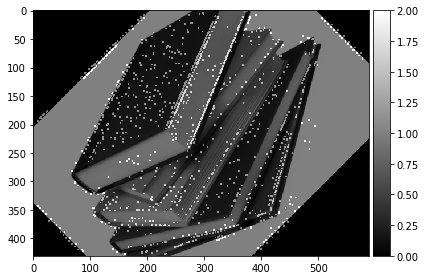

In [ ]:
io.imshow(img1_features,cmap='gray')

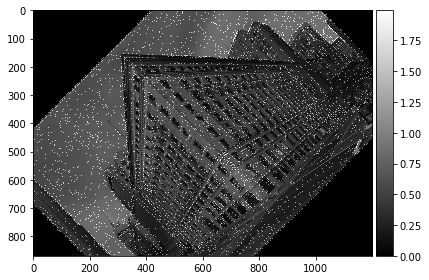

In [ ]:
io.imshow(img2_features,cmap='gray')

In [ ]:
x=img1_features
x=(x*255/2).astype(np.uint8)
x = Image.fromarray(x)
x.save('Image1_rotated.jpeg')
files.download('Image1_rotated.jpeg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
x=img2_features
x=(x*255/2).astype(np.uint8)
x = Image.fromarray(x)
x.save('Image2_rotated.jpeg')
files.download('Image2_rotated.jpeg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Upsampled image

In [ ]:
img1 = skimage.transform.rescale(book,2,anti_aliasing=False)
img2 = skimage.transform.rescale(building,2,anti_aliasing=False)

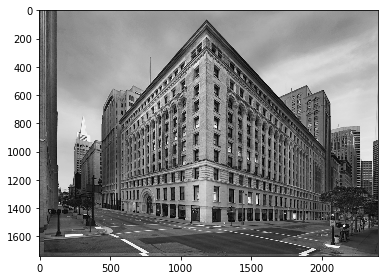

In [ ]:
io.imshow(img2)

In [ ]:
row = img1.shape[0]
col = img1.shape[1]
scale_space_img1,count= octave(img1,row,col)
print("The number of features is:")
print(count)

The number of features is:
3555


In [ ]:
row = img2.shape[0]
col = img2.shape[1]
scale_space_img2,count = octave(img2,row,col)
print("The number of features is:")
print(count)

The number of features is:
39884


In [ ]:
img1_features = np.zeros((img1.shape[0],img1.shape[1]))
for i in range(0,img1.shape[0]):
  for j in range(0,img1.shape[1]):
    temp = 0
    for k in range(0,len(scale_space_img1)):
      tmp = scale_space_img1[k]
      temp=temp+tmp[i][j]
      if temp>=1:
        img1_features[i][j]=1
        break
img1_features = img1_features + img1

In [ ]:
img2_features = np.zeros((img2.shape[0],img2.shape[1]))
for i in range(0,img2.shape[0]):
  for j in range(0,img2.shape[1]):
    temp = 0
    for k in range(0,len(scale_space_img2)):
      tmp = scale_space_img2[k]
      temp=temp+tmp[i][j]
      if temp>=1:
        img2_features[i][j]=1
        break
img2_features = img2_features + img2

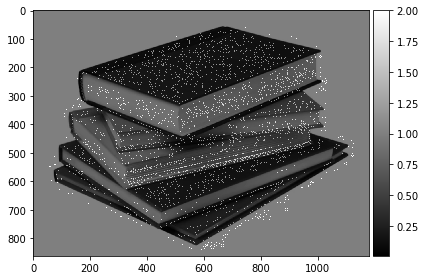

In [ ]:
io.imshow(img1_features,cmap='gray')

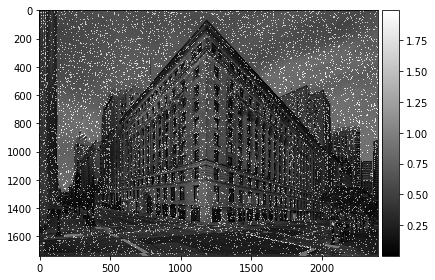

In [ ]:
io.imshow(img2_features,cmap='gray')

In [ ]:
x=img1_features
x=(x*255/2).astype(np.uint8)
x = Image.fromarray(x)
x.save('Image1_upsampled.jpeg')
files.download('Image1_upsampled.jpeg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
x=img2_features
x=(x*255/2).astype(np.uint8)
x = Image.fromarray(x)
x.save('Image2_upsampled.jpeg')
files.download('Image2_upsampled.jpeg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Downscaled image

In [ ]:
img1 = skimage.transform.rescale(book,0.5,anti_aliasing=False)
img2 = skimage.transform.rescale(building,0.5,anti_aliasing=False)

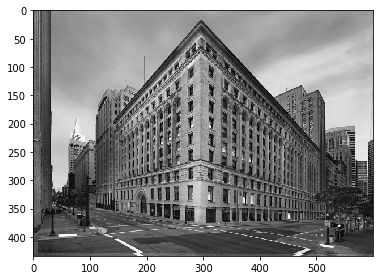

In [ ]:
io.imshow(img2)

In [ ]:
row = img1.shape[0]
col = img1.shape[1]
scale_space_img1,count = octave(img1,row,col)
print("The number of features is:")
print(count)

The number of features is:
584


In [ ]:
row = img2.shape[0]
col = img2.shape[1]
scale_space_img2,count = octave(img2,row,col)
print("The number of features is:")
print(count)

The number of features is:
1854


In [ ]:
img1_features = np.zeros((img1.shape[0],img1.shape[1]))
for i in range(0,img1.shape[0]):
  for j in range(0,img1.shape[1]):
    temp = 0
    for k in range(0,len(scale_space_img1)):
      tmp = scale_space_img1[k]
      temp=temp+tmp[i][j]
      if temp>=1:
        img1_features[i][j]=1
        break
img1_features = img1_features + img1

In [ ]:
img2_features = np.zeros((img2.shape[0],img2.shape[1]))
for i in range(0,img2.shape[0]):
  for j in range(0,img2.shape[1]):
    temp = 0
    for k in range(0,len(scale_space_img2)):
      tmp = scale_space_img2[k]
      temp=temp+tmp[i][j]
      if temp>=1:
        img2_features[i][j]=1
        break
img2_features = img2_features + img2

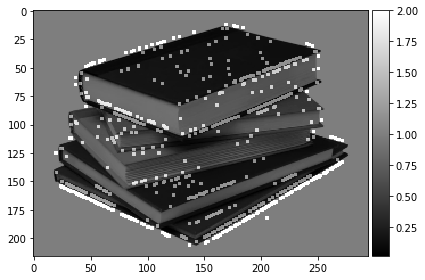

In [ ]:
io.imshow(img1_features,cmap='gray')

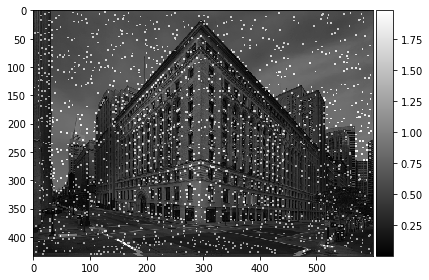

In [ ]:
io.imshow(img2_features,cmap='gray')

In [ ]:
x=img1_features
x=(x*255/2).astype(np.uint8)
x = Image.fromarray(x)
x.save('Image1_downsampled.jpeg')
files.download('Image1_downsampled.jpeg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
x=img2_features
x=(x*255/2).astype(np.uint8)
x = Image.fromarray(x)
x.save('Image2_downsampled.jpeg')
files.download('Image2_downsampled.jpeg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Gaussian blurred image

In [ ]:
img1 = scipy.ndimage.gaussian_filter(book,2)
img2 = scipy.ndimage.gaussian_filter(building,2)

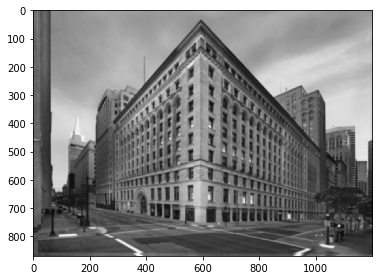

In [ ]:
io.imshow(img2)

In [ ]:
row = img1.shape[0]
col = img1.shape[1]
scale_space_img1,count = octave(img1,row,col)
print("The number of features is:")
print(count)

The number of features is:
293


In [ ]:
row = img2.shape[0]
col = img2.shape[1]
scale_space_img2,count = octave(img2,row,col)
print("The number of features is:")
print(count)

The number of features is:
5108


In [ ]:
img1_features = np.zeros((img1.shape[0],img1.shape[1]))
for i in range(0,img1.shape[0]):
  for j in range(0,img1.shape[1]):
    temp = 0
    for k in range(0,len(scale_space_img1)):
      tmp = scale_space_img1[k]
      temp=temp+tmp[i][j]
      if temp>=1:
        img1_features[i][j]=1
        break
img1_features = img1_features + img1

In [ ]:
img2_features = np.zeros((img2.shape[0],img2.shape[1]))
for i in range(0,img2.shape[0]):
  for j in range(0,img2.shape[1]):
    temp = 0
    for k in range(0,len(scale_space_img2)):
      tmp = scale_space_img2[k]
      temp=temp+tmp[i][j]
      if temp>=1:
        img2_features[i][j]=1
        break
img2_features = img2_features + img2

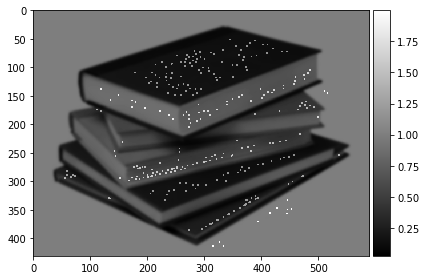

In [ ]:
io.imshow(img1_features,cmap='gray')

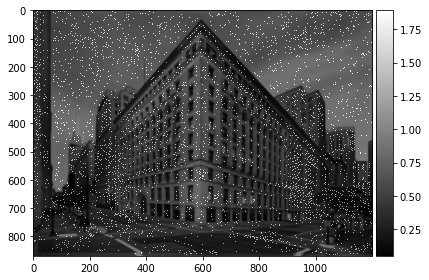

In [ ]:
io.imshow(img2_features,cmap='gray')

In [ ]:
x=img1_features
x=(x*255/2).astype(np.uint8)
x = Image.fromarray(x)
x.save('Image1_gaussian_blurred.jpeg')
files.download('Image1_gaussian_blurred.jpeg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
x=img2_features
x=(x*255/2).astype(np.uint8)
x = Image.fromarray(x)
x.save('Image2_gaussian_blurred.jpeg')
files.download('Image2_gaussian_blurred.jpeg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Gaussian Noise added image

In [ ]:
img1 = skimage.util.random_noise(book,mode='gaussian')
img2 = skimage.util.random_noise(building,mode='gaussian')

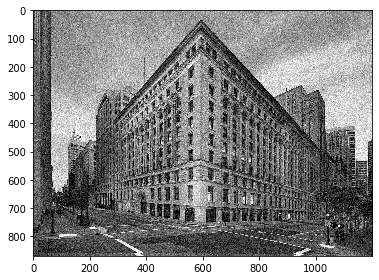

In [ ]:
io.imshow(img2)

In [ ]:
row = img1.shape[0]
col = img1.shape[1]
scale_space_img1,count = octave(img1,row,col)
print("The number of features is:")
print(count)

The number of features is:
1106


In [ ]:
row = img2.shape[0]
col = img2.shape[1]
scale_space_img2,count = octave(img2,row,col)
print("The number of features is:")
print(count)

The number of features is:
4603


In [ ]:
img1_features = np.zeros((img1.shape[0],img1.shape[1]))
for i in range(0,img1.shape[0]):
  for j in range(0,img1.shape[1]):
    temp = 0
    for k in range(0,len(scale_space_img1)):
      tmp = scale_space_img1[k]
      temp=temp+tmp[i][j]
      if temp>=1:
        img1_features[i][j]=1
        break
img1_features = img1_features + img1

In [ ]:
img2_features = np.zeros((img2.shape[0],img2.shape[1]))
for i in range(0,img2.shape[0]):
  for j in range(0,img2.shape[1]):
    temp = 0
    for k in range(0,len(scale_space_img2)):
      tmp = scale_space_img2[k]
      temp=temp+tmp[i][j]
      if temp>=1:
        img2_features[i][j]=1
        break
img2_features = img2_features + img2

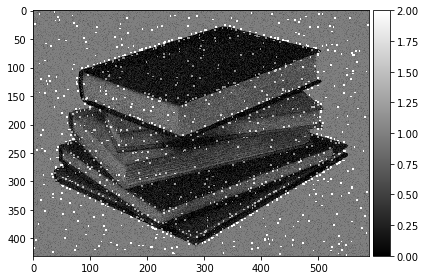

In [ ]:
io.imshow(img1_features,cmap='gray')

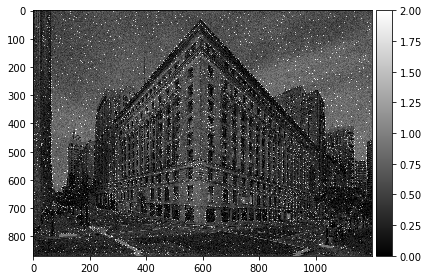

In [ ]:
io.imshow(img2_features,cmap='gray')

In [ ]:
x=img1_features
x=(x*255/2).astype(np.uint8)
x = Image.fromarray(x)
x.save('Image1_gaussian_noise.jpeg')
files.download('Image1_gaussian_noise.jpeg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
x=img2_features
x=(x*255/2).astype(np.uint8)
x = Image.fromarray(x)
x.save('Image2_gaussian_noise.jpeg')
files.download('Image2_gaussian_noise.jpeg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>